In [1]:
import pandas as pd
import numpy as np

# Define the data URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Read the raw data
raw_data = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Process the data
data = []
target = []

# Loop through the rows, taking into account the data structure
for i in range(0, len(raw_data), 2):
    # Combine two rows into one array
    combined_row = np.hstack([raw_data.iloc[i].values, raw_data.iloc[i + 1, :2].values])
    data.append(combined_row)
    # Append the target value from the second row
    target.append(raw_data.iloc[i + 1, 2])

# Convert lists to arrays
data = np.array(data)
target = np.array(target)

# Combine data and target into a single DataFrame
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"  # Add "TARGET" as the last column name
]

# Create the combined DataFrame
combined_df = pd.DataFrame(np.hstack([data, target.reshape(-1, 1)]), columns=column_names)

# Display the combined DataFrame
print(combined_df.head(),combined_df.tail())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2           CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1

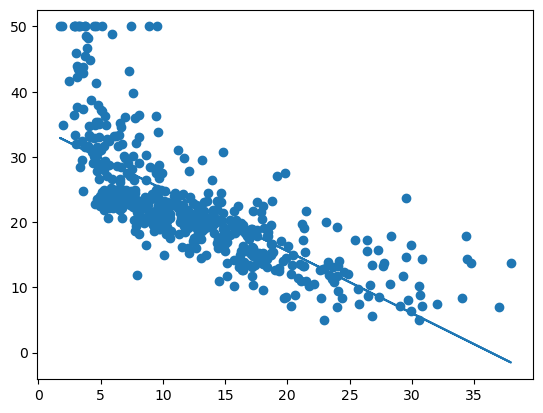

-0.7376627261740147


In [2]:
from scipy import stats
import matplotlib.pyplot as plt

X = combined_df["LSTAT"]
y = combined_df["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(X, y)

def myfunc_linear(x):
  return slope * x + intercept

mymodel = list(map(myfunc_linear, X))

plt.scatter(X, y)
plt.plot(X, mymodel)
plt.show()

print(r)




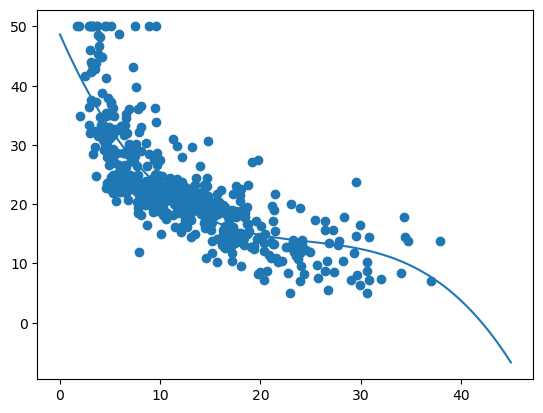

0.6578476405895719


In [3]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

X = combined_df["LSTAT"]
y = combined_df["MEDV"]

mymodel = numpy.poly1d(numpy.polyfit(X, y, 3))

myline = numpy.linspace(0, 45, 100)

plt.scatter(X, y)
plt.plot(myline, mymodel(myline))
plt.show()


print(r2_score(y, mymodel(X)))

### Using liner regression model tested with LSTAT we got an r coffeffcient of -0.7376627261740147 which shows a good fit for the model which was better than the polynomial regression at 0.6578476405895719


### Therefore, we can predict hosuing prices using this the linear regression model

In [5]:
### Printing out some predictions

print(myfunc_linear(20), myfunc_linear(31))

15.55285380422329 5.10231091288539


### Looking forward we try to model the predictions using Multiplelinear Regression

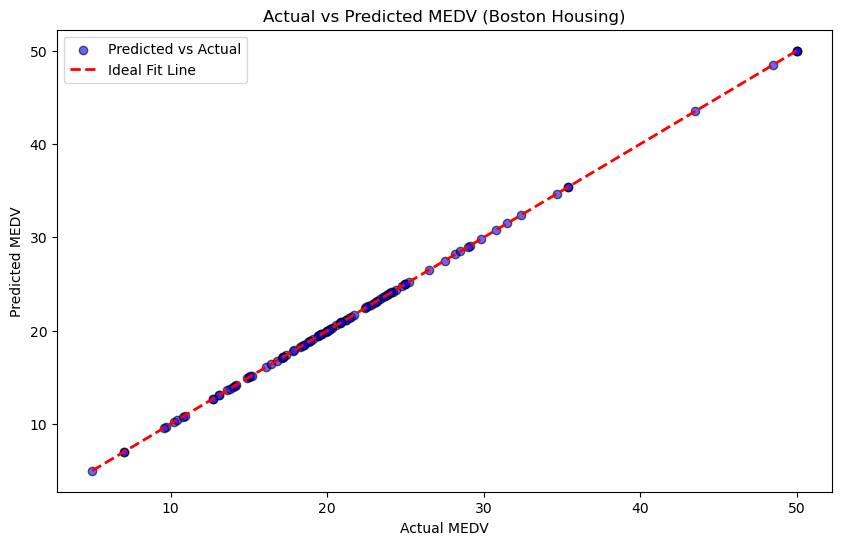

Mean Squared Error: 1.3742343665472192e-27
R^2 Score: 1.0
Intercept: 2.2026824808563106e-13
    Feature   Coefficient
0      CRIM  5.051332e-17
1        ZN -9.956109e-19
2     INDUS  1.291458e-15
3      CHAS  1.668107e-14
4       NOX -4.876398e-14
5        RM  2.965462e-15
6       AGE  7.344931e-17
7       DIS -2.500105e-16
8       RAD  5.129588e-16
9       TAX -1.796673e-16
10  PTRATIO -1.754183e-16
11        B -4.152959e-16
12    LSTAT  4.506191e-16
13     MEDV  1.000000e+00


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Load the Boston housing dataset
X = combined_df[column_names]
y = combined_df["MEDV"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display the feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV (Boston Housing)')
plt.legend()
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Intercept: {intercept}')
print(coeff_df)


### We see that this is a perfect model for predicting the prizing of hosuing in using the boston dataset